# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html). Inspect the page to identify which elements to scrape. Note that the URL is `https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html`.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)




### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
mars_soup = soup(html, 'html.parser')

In [5]:
# Extract all rows of data
table_data = mars_soup.find('table', class_='table')
table_data.find_all('tr')

[<tr>
 <th>id</th>
 <th>terrestrial_date</th>
 <th>sol</th>
 <th>ls</th>
 <th>month</th>
 <th>min_temp</th>
 <th>pressure</th>
 </tr>,
 <tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-2

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list

# Loop through the scraped data to create a list of rows
# Read in HTML tables into a DataFrame
draft_df = pd.read_html(url)
# Select the first table
draft_df[0]


mars_df = pd.DataFrame(draft_df[0])

# Confirm DataFrame was created successfully
mars_df 


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [7]:
# Examine data type of each column
mars_df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [8]:
# Change data types for data analysis
mars_df['terrestrial_date'] =  pd.to_datetime(mars_df['terrestrial_date'], infer_datetime_format=True)

In [9]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [10]:
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [13]:
# 1. How many months are there on Mars?
#months = mars_df['month'].unique()
#print(count(months))

#n = len(pd.unique(mars_df['month']))
#print("No.of months :", n)

#mars_df['month'].value_counts().sort_index()

mars_months = pd.unique(mars_df['month'])
mars_months

array([ 6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5])

In [15]:
# 2. How many Martian days' worth of data are there?
# Col 'sol' is Martian solar days since arrival of Curiosity
n = len(pd.unique(mars_df['sol']))
  
print("No.of Martian days' worth of data :", 
      n)

No.of Martian days' worth of data : 1867


In [16]:
# 3. What is the average low temperature by month?
avg_lowtemps = mars_df.groupby('month')['min_temp'].mean()
avg_lowtemps

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

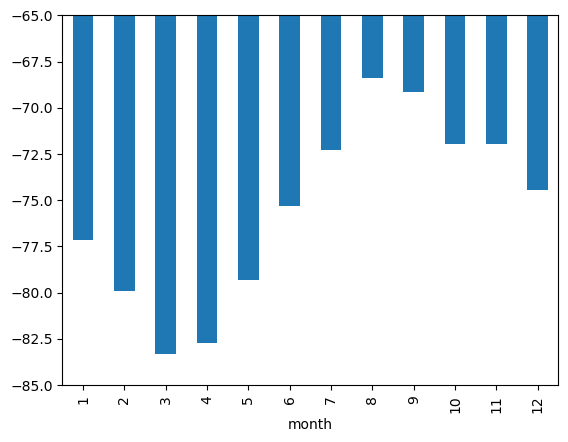

In [17]:
# Plot the average temperature by month
# First attempt here didn't work because it plots all columns. 
# mars_df.groupby('month').mean('min_temp').plot.bar()

# Here, create a new df where all columns are averaged by month
low_df = mars_df.groupby(['month']).mean()
# Now, just choose the averaged 'min_temp' in that df
low1 = low_df['min_temp']
# Print a df of the average low temps by month
low1

# Plot the average low temps by month in a bar graph
# Set y-axis limits to show a better range
low1.plot.bar()
plt.ylim([-85, -65])
plt.show()


In [18]:
# Identify the coldest and hottest months in Curiosity's location
low_df = mars_df.groupby(['month']).mean()
# Now, just choose the averaged 'min_temp' in that df
low1 = low_df['min_temp']
# Print a df of the average low temps sorted low to high by month
low1.sort_values()



month
3    -83.307292
4    -82.747423
2    -79.932584
5    -79.308725
1    -77.160920
6    -75.299320
12   -74.451807
7    -72.281690
11   -71.985507
10   -71.982143
9    -69.171642
8    -68.382979
Name: min_temp, dtype: float64

In [19]:
# 4. Average pressure by Martian month
pressure_df = mars_df.groupby(['month']).mean()
# Now, just choose the averaged 'pressure' in that df
pressure = pressure_df['pressure']
# Print a df of the average low temps by month
pressure




month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

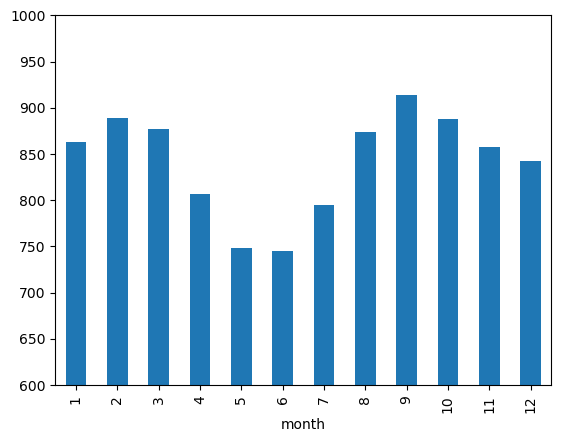

In [20]:
# Plot the average pressure by month

# Set y-axis limits to show a better range
pressure.plot.bar()
plt.ylim([600, 1000])
plt.show()

In [32]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    # Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    # Visually estimate the result by plotting the daily minimum temperature.
# calculate how many sols exist in a Martian year based on monthly elapsed sols
sols = 0
for mm in mars_months:
    sol_duration = mars_df.loc[mars_df['month'] == mm, 'sol'].max() - mars_df.loc[mars_df['month'] == mm, 'sol'].min()
    sols += (sol_duration / 24.66)
# number of Martian days included in the dataset
sol_range = mars_df['sol'].max() - mars_df['sol'].min()
# statistically calculate total orbital periods (= total Martian years)
mars_year = sol_range/sols

print("How many terrestrial years are there in a Martian year? ", mars_year)

print("How many terrestrial days are there in a Martian year? ", sols)




How many terrestrial years are there in a Martian year?  2.9110136229970593
How many terrestrial days are there in a Martian year?  675.7096512570965


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [33]:
# Write the data to a CSV
file_name = './mars_data.csv'
mars_df.to_csv(file_name, index=False)

In [34]:
browser.quit()